In [3]:
# Importing the required libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
df=pd.read_csv('Ads_CTR_Optimisation.csv')

In [6]:
# Implementing Upper confidence bound model
N=10000
d=10
total_ads_selected=[]
total_selections=[0]*d
reward_sum=[0]*d
total_reward=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if (total_selections[i]>0):
      avg_reward=reward_sum[i]/total_selections[i]
      deltai=math.sqrt(3/2*math.log(n+1)/total_selections[i])
      upper_bound=avg_reward+deltai
    else:
      upper_bound=1e400
    if (upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
  total_ads_selected.append(ad)
  total_selections[ad]=total_selections[ad]+1
  reward=df.values[n,ad]
  reward_sum[ad]=reward_sum[ad]+reward
  total_reward=total_reward+reward

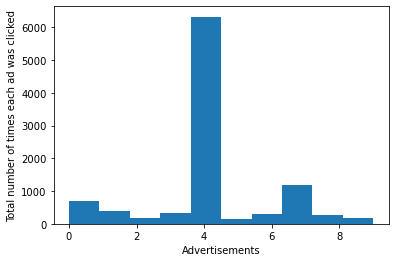

In [9]:
# Visualising the results

plt.hist(total_ads_selected)
plt.xlabel('Advertisements')
plt.ylabel('Total number of times each ad was clicked')
plt.show()